In [28]:
# imports
import os
import matplotlib.pyplot as plt
import pandas as pd

## Data Loading

In [29]:
# function to get training and testing data
def get_train_test_data(
    csv_filepath='data/archive/Data_Entry_2017.csv',
    train_filepath='data/archive/train_val_list.txt',
    test_filepath='data/archive/test_list.txt'
    ):
  all_images = pd.read_csv(csv_filepath)
  train_ids = pd.read_csv(train_filepath,sep=' ',header=None,names=['Image Index'])
  test_ids = pd.read_csv(test_filepath,sep=' ',header=None,names=['Image Index'])
  train_data = pd.merge(all_images,train_ids,how='inner')
  test_data = pd.merge(all_images,test_ids,how='inner')

  return all_images,train_data,test_data

df, train_df, test_df = get_train_test_data()

In [30]:
def remove_multiple_labels(df):
    df2 = df["Finding Labels"].str.split("|",expand=True)
    for i in range(1,6):
        df2.loc[df2[i] == "Mass", 0] = "Mass"
        df2.loc[~ df2[i].isna(), 0] = "Drop"

    df['Finding Labels'] = df2[0]
    df = df[df["Finding Labels"] != "Drop"]
    return df

train_df = remove_multiple_labels(train_df)
test_df = remove_multiple_labels(test_df)

In [31]:
train_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143000,0.143000,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171000,0.171000,NaN
5,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168000,0.168000,NaN
6,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168000,0.168000,NaN
7,00000005_002.png,No Finding,2,5,69,F,AP,2500,2048,0.168000,0.168000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
86511,00030786_000.png,Effusion,0,30786,61,F,PA,2021,2021,0.194311,0.194311,NaN
86517,00030786_006.png,Consolidation,6,30786,61,F,AP,3056,2544,0.139000,0.139000,NaN
86519,00030789_000.png,Infiltration,0,30789,52,F,PA,2021,2021,0.194311,0.194311,NaN
86521,00030795_000.png,Pleural_Thickening,0,30795,53,F,PA,2021,2021,0.194311,0.194311,NaN


## Preprocessing

We have multiple labels per observation.

* Atelectasis
* Cardiomegaly
* Effusion
* Infiltration
* Mass
* Nodule
* Pneumonia
* Pneumothorax
* Consolidation
* Edema
* Emphysema
* Fibrosis
* Pleural_Thickening
* Hernia

"Mass" is difficult to detect, therefore if there any "multiple-diagnoses" with this label, we will make the observation solely "Mass". All other multiple-diagnoses will be disregarded.

## Exploratory Data Analysis

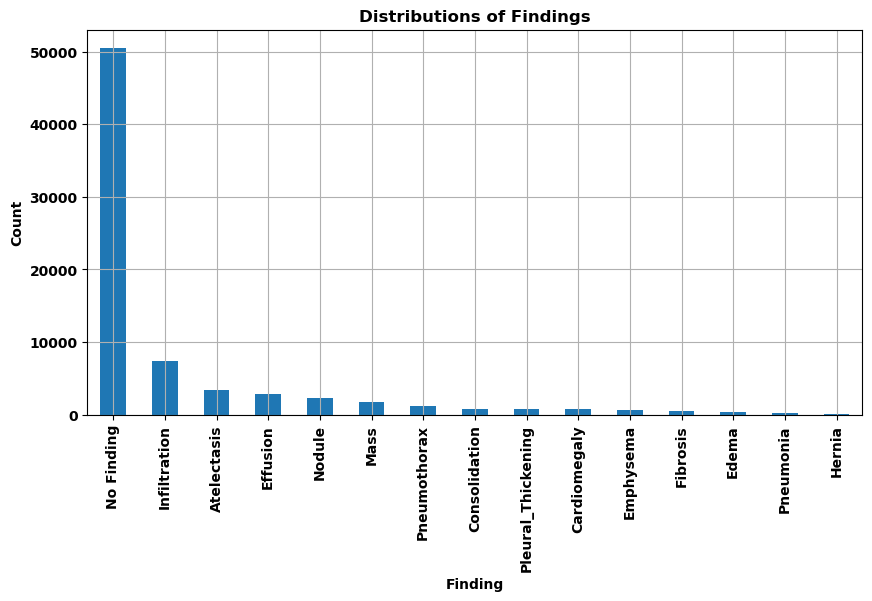

In [33]:
# plot labels and their counts
fig, ax = plt.subplots(figsize=(10,5))
train_df['Finding Labels'].value_counts().plot.bar(y='Finding Labels')
ax.set_title("Distributions of Findings")
ax.set_xlabel("Finding")
ax.set_ylabel("Count")
ax.grid(True)
plt.show();